# Lab 8 - K-Nearest Neighbour and ID-3 Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

### Q1 - A

The new fruit is classified as: Apple
Fruit 1:
Euclidean Distance: 15.07
Manhattan Distance: 16.50
Minkowski Distance (p=3): 15.00
Fruit 2:
Euclidean Distance: 35.00
Manhattan Distance: 35.50
Minkowski Distance (p=3): 35.00
Fruit 3:
Euclidean Distance: 15.07
Manhattan Distance: 16.50
Minkowski Distance (p=3): 15.00
Fruit 4:
Euclidean Distance: 5.02
Manhattan Distance: 5.50
Minkowski Distance (p=3): 5.00
Fruit 5:
Euclidean Distance: 5.02
Manhattan Distance: 5.50
Minkowski Distance (p=3): 5.00
Fruit 6:
Euclidean Distance: 25.12
Manhattan Distance: 27.50
Minkowski Distance (p=3): 25.01


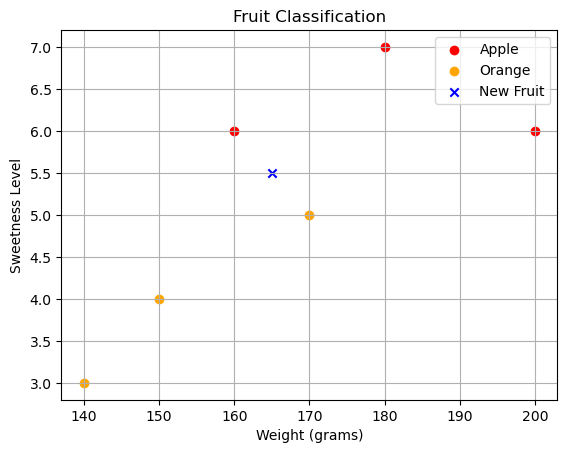

In [16]:
fruits = [
    {'id': 1, 'weight': 180, 'sweetness': 7, 'label': 'Apple'},
    {'id': 2, 'weight': 200, 'sweetness': 6, 'label': 'Apple'},
    {'id': 3, 'weight': 150, 'sweetness': 4, 'label': 'Orange'},
    {'id': 4, 'weight': 170, 'sweetness': 5, 'label': 'Orange'},
    {'id': 5, 'weight': 160, 'sweetness': 6, 'label': 'Apple'},
    {'id': 6, 'weight': 140, 'sweetness': 3, 'label': 'Orange'}
]

new_fruit = {'weight': 165, 'sweetness': 5.5}

def euclidean_distance(fruit, new_fruit):
    return np.sqrt((fruit['weight'] - new_fruit['weight'])**2 + (fruit['sweetness'] - new_fruit['sweetness'])**2)

def manhattan_distance(fruit, new_fruit):
    return abs(fruit['weight'] - new_fruit['weight']) + abs(fruit['sweetness'] - new_fruit['sweetness'])

def minkowski_distance(fruit, new_fruit, p=3):
    return (abs(fruit['weight'] - new_fruit['weight'])**p + abs(fruit['sweetness'] - new_fruit['sweetness'])**p)**(1/p)

def knn_classify(new_fruit, k=3):
    distances = []
    for fruit in fruits:
        dist = euclidean_distance(fruit, new_fruit) 
        distances.append((dist, fruit['label']))
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    labels = [neighbor[1] for neighbor in nearest_neighbors]
    return max(set(labels), key=labels.count)  

label = knn_classify(new_fruit, k=3)
print(f'The new fruit is classified as: {label}')

for fruit in fruits:
    print(f"Fruit {fruit['id']}:")
    print(f"Euclidean Distance: {euclidean_distance(fruit, new_fruit):.2f}")
    print(f"Manhattan Distance: {manhattan_distance(fruit, new_fruit):.2f}")
    print(f"Minkowski Distance (p=3): {minkowski_distance(fruit, new_fruit, p=3):.2f}")

def plot_data():
    for fruit in fruits:
        if fruit['label'] == 'Apple':
            plt.scatter(fruit['weight'], fruit['sweetness'], color='red', label='Apple' if fruit['id'] == 1 else "")
        else:
            plt.scatter(fruit['weight'], fruit['sweetness'], color='orange', label='Orange' if fruit['id'] == 3 else "")
    plt.scatter(new_fruit['weight'], new_fruit['sweetness'], color='blue', label='New Fruit', marker='x')
    plt.xlabel('Weight (grams)')
    plt.ylabel('Sweetness Level')
    plt.legend()
    plt.title('Fruit Classification')
    plt.grid(True)
    plt.show()

plot_data()

### Q1 - B

The new fruit is classified as: Orange
Fruit 1:
Euclidean Distance: 15.07
Manhattan Distance: 16.50
Minkowski Distance (p=3): 15.00
Fruit 2:
Euclidean Distance: 35.00
Manhattan Distance: 35.50
Minkowski Distance (p=3): 35.00
Fruit 3:
Euclidean Distance: 15.07
Manhattan Distance: 16.50
Minkowski Distance (p=3): 15.00
Fruit 4:
Euclidean Distance: 5.02
Manhattan Distance: 5.50
Minkowski Distance (p=3): 5.00
Fruit 5:
Euclidean Distance: 5.02
Manhattan Distance: 5.50
Minkowski Distance (p=3): 5.00
Fruit 6:
Euclidean Distance: 25.12
Manhattan Distance: 27.50
Minkowski Distance (p=3): 25.01


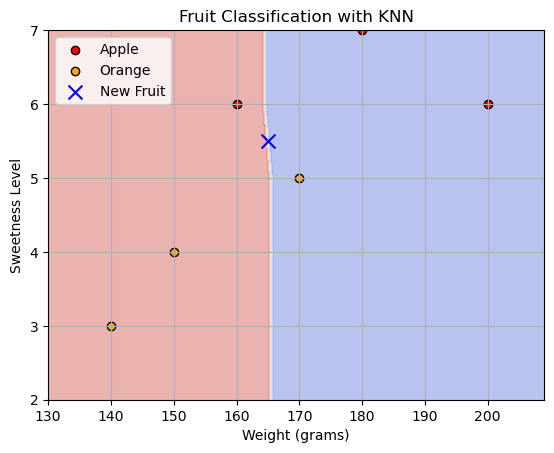

In [17]:
X = np.array([[180, 7], [200, 6], [150, 4], [170, 5], [160, 6], [140, 3]])
y = np.array([0, 0, 1, 1, 0, 1])

new_fruit = np.array([[165, 5.5]])

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)

pred_label = knn.predict(new_fruit)
print(f'The new fruit is classified as: {"Apple" if pred_label == 0 else "Orange"}')

euclidean_distances = pairwise_distances(X, new_fruit, metric='euclidean')
manhattan_distances = pairwise_distances(X, new_fruit, metric='manhattan')
minkowski_distances = pairwise_distances(X, new_fruit, metric='minkowski', p=3)

for i in range(len(X)):
    print(f"Fruit {i+1}:")
    print(f"Euclidean Distance: {euclidean_distances[i][0]:.2f}")
    print(f"Manhattan Distance: {manhattan_distances[i][0]:.2f}")
    print(f"Minkowski Distance (p=3): {minkowski_distances[i][0]:.2f}")

def plot_decision_boundary():
    h = 1  
    x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='Apple', edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='orange', label='Orange', edgecolor='k')
    plt.scatter(new_fruit[:, 0], new_fruit[:, 1], c='blue', label='New Fruit', marker='x', s=100)
    
    plt.xlabel('Weight (grams)')
    plt.ylabel('Sweetness Level')
    plt.title('Fruit Classification with KNN')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary()

### Q2 - A

In [18]:
def entropy(data):
    total = len(data)
    count = {}
    for row in data:
        label = row[-1]
        if label not in count:
            count[label] = 0
        count[label] += 1
    entropy_val = 0
    for key in count:
        prob = count[key] / total
        entropy_val -= prob * math.log2(prob)
    return entropy_val

def split_data(data, feature_index, value):
    split = []
    for row in data:
        if row[feature_index] == value:
            reduced_row = row[:feature_index] + row[feature_index+1:]
            split.append(reduced_row)
    return split

def info_gain(data, feature_index):
    total_entropy = entropy(data)
    values = set([row[feature_index] for row in data])
    weighted_entropy = 0
    for value in values:
        subset = split_data(data, feature_index, value)
        prob = len(subset) / len(data)
        weighted_entropy += prob * entropy(subset)
    return total_entropy - weighted_entropy

def best_feature(data):
    best_gain = 0
    best_index = 0
    for i in range(len(data[0]) - 1): 
        gain = info_gain(data, i)
        if gain > best_gain:
            best_gain = gain
            best_index = i
    return best_index

def id3(data, features):
    labels = [row[-1] for row in data]
    if labels.count(labels[0]) == len(labels):  
        return labels[0]
    if len(data[0]) == 1: 
        return max(set(labels), key=labels.count)
    
    best_feat = best_feature(data)
    best_feat_name = features[best_feat]
    tree = {best_feat_name: {}}
    feature_values = set([row[best_feat] for row in data])
    
    for value in feature_values:
        subset = split_data(data, best_feat, value)
        subtree = id3(subset, features[:best_feat] + features[best_feat+1:])
        tree[best_feat_name][value] = subtree
    return tree

data = [
    [30, 'High', 'High', 'Sick'],
    [45, 'Low', 'Normal', 'Healthy'],
    [50, 'High', 'High', 'Sick'],
    [35, 'Low', 'Normal', 'Healthy'],
    [60, 'High', 'High', 'Sick'],
    [55, 'Low', 'Normal', 'Healthy'],
    [40, 'High', 'High', 'Sick'],
    [25, 'Low', 'Normal', 'Healthy'],
    [65, 'High', 'High', 'Sick'],
    [45, 'Low', 'Normal', 'Healthy']
]

features = ['Age', 'Blood Pressure', 'Cholesterol']

tree = id3(data, features)
print(tree)

def classify(tree, features, patient):
    if isinstance(tree, dict):
        root = list(tree.keys())[0]
        feature_index = features.index(root)
        subtree = tree[root][patient[feature_index]]
        return classify(subtree, features, patient)
    else:
        return tree
    
new_patient = [50, 'Low', 'Normal']
diagnosis = classify(tree, features, new_patient)
print(f"Diagnosis for new patient: {diagnosis}")

{'Age': {65: 'Sick', 35: 'Healthy', 40: 'Sick', 45: 'Healthy', 50: 'Sick', 55: 'Healthy', 25: 'Healthy', 60: 'Sick', 30: 'Sick'}}
Diagnosis for new patient: Sick


### Q2 - B

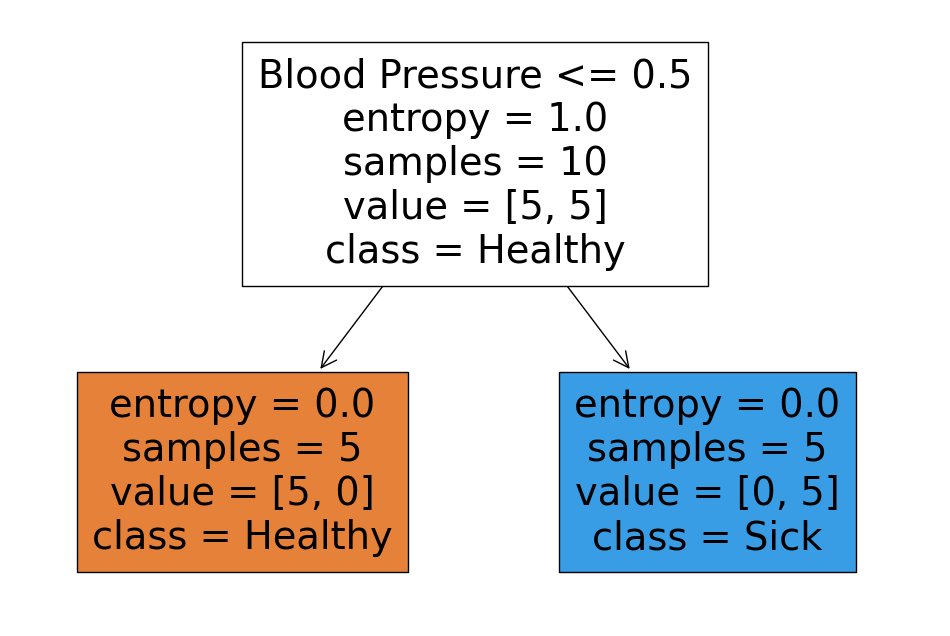

Prediction for new patient: Healthy


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [19]:
data = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

df['Blood Pressure'] = df['Blood Pressure'].map({'High': 1, 'Low': 0})
df['Cholesterol'] = df['Cholesterol'].map({'High': 1, 'Normal': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Sick': 1, 'Healthy': 0})

X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Age', 'Blood Pressure', 'Cholesterol'], class_names=['Healthy', 'Sick'], filled=True)
plt.show()

new_patient = np.array([[50, 0, 0]])
prediction = clf.predict(new_patient)

diagnosis = 'Sick' if prediction == 1 else 'Healthy'
print(f"Prediction for new patient: {diagnosis}")